In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# ans no a
column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in column:
    print(f"{col} have {df[col].nunique()} unique values")

gender have 3 unique values
ever_married have 2 unique values
work_type have 5 unique values
Residence_type have 2 unique values
smoking_status have 4 unique values


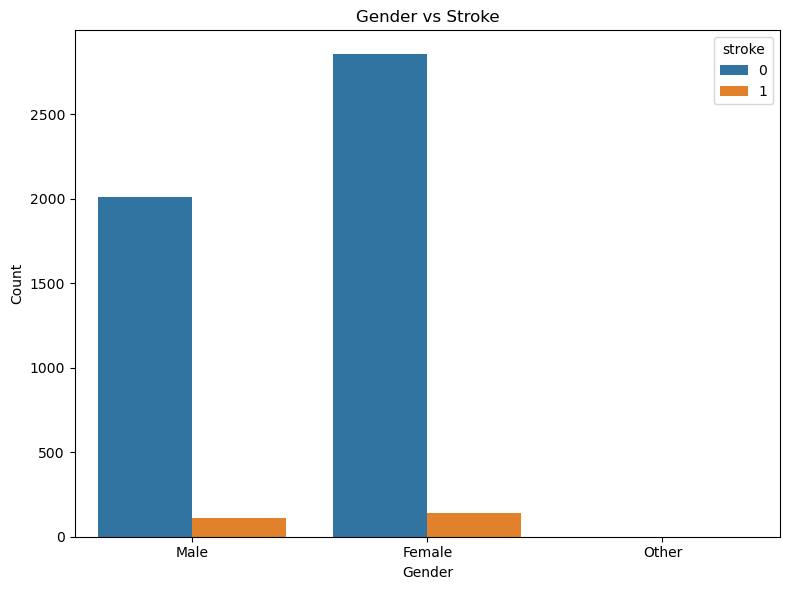

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'gender', data=df, hue='stroke')
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [6]:
stroke_count = df[['gender', 'stroke']]

In [7]:
male_stroke = stroke_count.query("gender == 'Male' and stroke == 1")
male_non_stroke = stroke_count.query("gender == 'Male' and stroke == 0")
female_stroke = stroke_count.query("gender == 'Female' and stroke == 1")
female_non_stroke = stroke_count.query("gender == 'Female' and stroke == 0")
other_stroke = stroke_count.query("gender == 'Other' and stroke == 1")
other_non_stroke = stroke_count.query("gender == 'Other' and stroke == 0")

In [8]:
counts = [male_non_stroke.shape[0], male_stroke.shape[0], 
          female_non_stroke.shape[0], female_stroke.shape[0], 
          other_non_stroke.shape[0], other_stroke.shape[0]]

In [9]:
label = ['Male Stroke', 'Male Non Stroke', 'Female Stroke', 'Female Non Stroke', 'Other Stroke', 'Other Non Stroke']

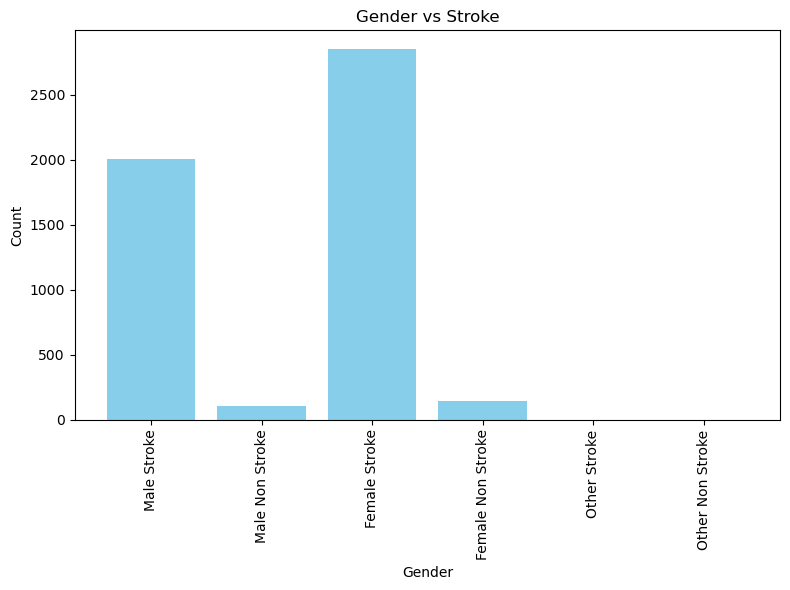

In [10]:
# sohoj niyom
plt.figure(figsize=(8, 6))
plt.bar(label, counts, color = 'skyblue')
plt.xticks(rotation=90)
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

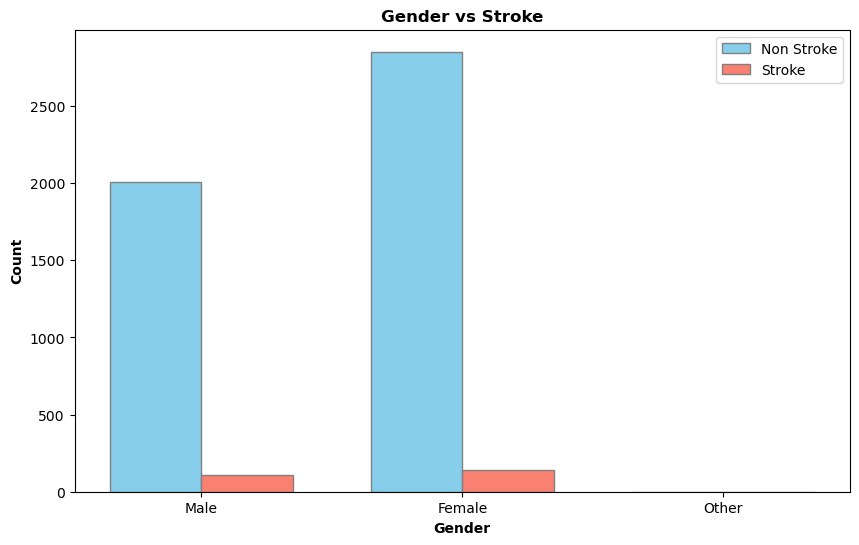

In [11]:
# Raw niyom
gender_categories = ['Male', 'Female', 'Other']
stroke_labels = ['Non Stroke', 'Stroke']

male_counts = [male_non_stroke.shape[0], male_stroke.shape[0]] 
female_counts = [female_non_stroke.shape[0], female_stroke.shape[0]] 
other_counts = [ other_non_stroke.shape[0], other_stroke.shape[0]]

num_gender_categories = len(gender_categories)
num_stroke_labels = len(stroke_labels)

bar_width = 0.35

r1 = np.arange(num_gender_categories)
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

plt.bar(r1, [male_counts[0], female_counts[0], other_counts[0]], color='skyblue', width=bar_width, edgecolor='grey', label='Non Stroke')
plt.bar(r2, [male_counts[1], female_counts[1], other_counts[1]], color='salmon', width=bar_width, edgecolor='grey', label='Stroke')

plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(num_gender_categories)], gender_categories)

plt.title('Gender vs Stroke', fontweight='bold')
plt.legend()

plt.show()

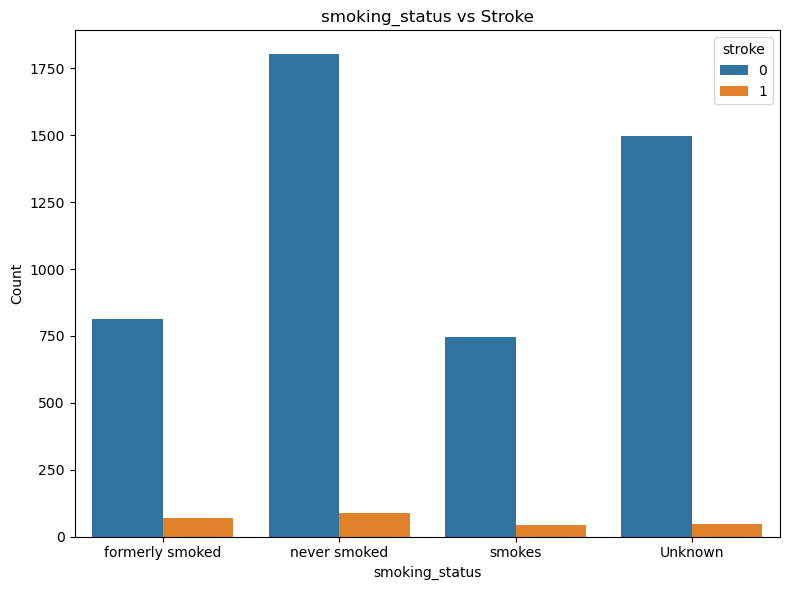

In [12]:
# shohoj niyom
plt.figure(figsize=(8, 6))
sns.countplot(x = 'smoking_status', data = df, hue='stroke')
plt.title('smoking_status vs Stroke')
plt.xlabel('smoking_status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [13]:
smoking_count = df[['smoking_status', 'stroke']]

In [14]:
formerly_smoked_stroke = smoking_count.query("smoking_status == 'formerly smoked' and stroke == 1")
formerly_smoked_non_stroke = smoking_count.query("smoking_status == 'formerly smoked' and stroke == 0")
never_smoked_stroke = smoking_count.query("smoking_status == 'never smoked' and stroke == 1")
never_smoked_non_stroke = smoking_count.query("smoking_status == 'never smoked' and stroke == 0")
smokes_smoked_stroke = smoking_count.query("smoking_status == 'smokes' and stroke == 1")
smoked_smoked_non_stroke = smoking_count.query("smoking_status == 'smokes' and stroke == 0")
unknown_smoked_stroke = smoking_count.query("smoking_status == 'Unknown' and stroke == 1")
unknown_smoked_non_stroke = smoking_count.query("smoking_status == 'Unknown' and stroke == 0")

In [15]:
smoke_cat_count = [
    formerly_smoked_stroke.shape[0],
    formerly_smoked_non_stroke.shape[0],
    never_smoked_stroke.shape[0],
    never_smoked_non_stroke.shape[0],
    smokes_smoked_stroke.shape[0],
    smoked_smoked_non_stroke.shape[0],
    unknown_smoked_stroke.shape[0],
    unknown_smoked_non_stroke.shape[0]
]

In [16]:
smoke_cat_label = [
    'formerly_smoked_stroke',
    'formerly_smoked_non_stroke',
    'never_smoked_stroke',
    'never_smoked_non_stroke',
    'smokes_smoked_stroke',
    'smokes_smoked_non_stroke',
    'unknown_smoked_stroke',
    'unknown_smoked_non_stroke'
]

In [17]:
smoke_dict = dict(zip(smoke_cat_label, smoke_cat_count))
for k, v in smoke_dict.items():
    print(f"{k} = {v} jon")

formerly_smoked_stroke = 70 jon
formerly_smoked_non_stroke = 815 jon
never_smoked_stroke = 90 jon
never_smoked_non_stroke = 1802 jon
smokes_smoked_stroke = 42 jon
smokes_smoked_non_stroke = 747 jon
unknown_smoked_stroke = 47 jon
unknown_smoked_non_stroke = 1497 jon


In [18]:
smoking_status_label = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
stroke_label = ['Stroke', 'Never Stroke']

In [19]:
formerly_smoked_count = [formerly_smoked_stroke.shape[0], formerly_smoked_non_stroke.shape[0]]
never_smoked_count = [never_smoked_stroke.shape[0], never_smoked_non_stroke.shape[0]]
smokes_count = [smokes_smoked_stroke.shape[0], smoked_smoked_non_stroke.shape[0]]
unknown_count = [unknown_smoked_stroke.shape[0], unknown_smoked_non_stroke.shape[0]]

In [20]:
num_smoking_status_label = len(smoking_status_label)

In [21]:
bar_width = 0.35
bar_1 = np.arange(num_smoking_status_label)
bar_2 = [i + bar_width for i in bar_1]

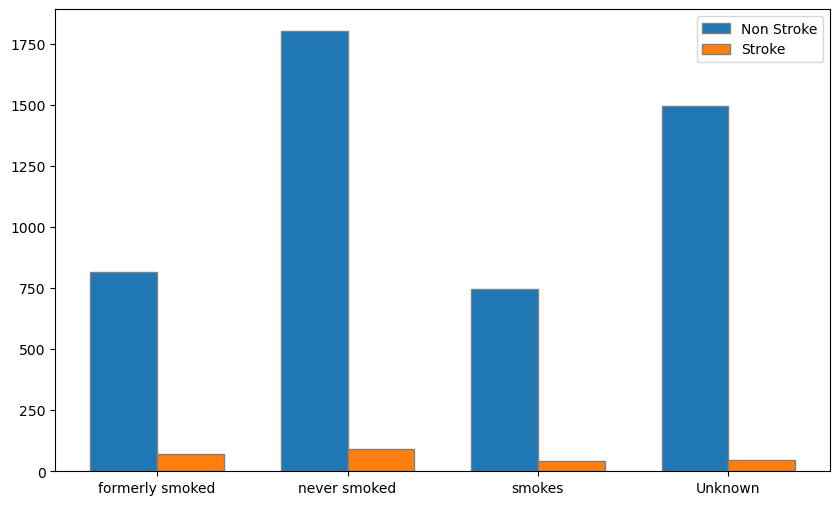

In [22]:
plt.figure(figsize=(10, 6))

plt.bar(bar_1, [formerly_smoked_count[1], never_smoked_count[1], smokes_count[1], unknown_count[1]], width=bar_width, edgecolor='grey', label='Non Stroke')
plt.bar(bar_2, [formerly_smoked_count[0], never_smoked_count[0], smokes_count[0], unknown_count[0]], width=bar_width, edgecolor='grey', label='Stroke')

plt.xticks([i + bar_width/2 for i in range(num_smoking_status_label)], smoking_status_label)
plt.legend()
plt.show()

In [23]:
urban_stroke = df.query("Residence_type == 'Urban' and stroke == 1")
rural_stroke = df.query("Residence_type == 'Rural' and stroke == 1")

In [24]:
print(f"Stroke Count difference between Urban and Rural Areas is {urban_stroke.shape[0] - rural_stroke.shape[0]}")

Stroke Count difference between Urban and Rural Areas is 21
